In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
# Load the dataset
file_path = 'customer_sales.csv'
df = pd.read_csv(file_path)

# Understanding the Dataset

In [5]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0
2,AZ-2011-6674300,1/4/11,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21.0,3.0
3,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22.0,2.0
4,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,12/31/14,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,$245,91.0,2.0
8043,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,$30,-10.0,2.0
8044,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,$23,-6.0,4.0
8045,BN-2014-4140795,12/31/14,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,$108,-19.0,3.0


### 1. Are there any missing values in the dataset?

In [7]:
# ProfileReport(df)

In [8]:
df.isna().sum()

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64

In [9]:
# 1. Clean the 'Sales' column (Remove '$', ',' and convert to numeric)
df['Sales'] = df['Sales'].replace({r'\$': '', ',': ''}, regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

categorical_columns = [
    'Customer Name', 'Country', 'State', 'City', 
    'Segment', 'Ship Mode', 'Category'
]
df['Order Date'] = pd.to_datetime(df['Order Date'],  errors='coerce')
columns_to_check = categorical_columns + ['Order Date']  # Include date and categorical columns
df = df.dropna(subset=columns_to_check)

# 4. Fill missing values for numerical columns with mean
numerical_columns = ['Discount', 'Profit', 'Quantity']
for col in numerical_columns:
    mean_value = df[col].mean()
    df.loc[df[col].isna(), col] = mean_value

df = df.dropna(subset=['Sales'])

# 5. Verify the dataset
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
dtype: int64


/var/folders/xs/pcg0lb2j5jn729tt2gvpzc800000gn/T/ipykernel_70323/3302735418.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'],  errors='coerce')


### Data Cleaning Steps and Interpretation

#### **1. Cleaning the `Sales` Column**
- **What was done**: 
  - Removed `$` and `,` symbols from the `Sales` column to standardize it.
  - Converted the cleaned values to numeric format, replacing invalid entries with `NaN`.
- **Why it was done**: 
  - To ensure the `Sales` column is in a usable numeric format for calculations and analysis, such as calculating total revenue or building regression models.

#### **2. Handling Missing Values in Categorical Columns**
- **What was done**:
  - Removed rows with missing values in critical categorical columns like `Customer Name`, `Country`, `State`, `City`, `Segment`, `Ship Mode`, and `Category`, as well as the `Order Date`.
- **Why it was done**:
  - These columns are likely key features for analysis, and missing values in them could lead to incomplete or inaccurate insights. Removing rows ensures data completeness.

#### **3. Handling Missing Values in Numerical Columns**
- **What was done**:
  - For columns like `Discount`, `Profit`, and `Quantity`, missing values were filled with their respective mean values.
- **Why it was done**:
  - To retain as much data as possible while ensuring these numerical fields are complete. Filling with the mean prevents data loss and avoids introducing bias into the dataset.

#### **4. Dropping Missing Values in `Sales`**
- **What was done**:
  - Rows with missing values in the `Sales` column were removed entirely.
- **Why it was done**:
  - Since `Sales` is a core metric for analysis, having missing values would compromise the accuracy of calculations and insights. Ensuring all rows have valid `Sales` values was crucial.

#### **5. Final Verification**
- **What was done**:
  - Checked for any remaining missing values in the dataset after all cleaning steps were applied.
- **Why it was done**:
  - To confirm the dataset is fully cleaned and ready for further analysis without any incomplete data.

In [10]:
df.describe()

,Order Date,Discount,Sales,Profit,Quantity
count,8022,8022.000000,8022.000000,8022.000000,8022.000000
mean,2013-04-21 11:58:01.525804032,0.112184,343.271753,35.009874,3.769875
min,2011-01-01 00:00:00,0.000000,-110.000000,-3060.000000,1.000000
25%,2012-06-12 00:00:00,0.000000,48.000000,1.000000,2.000000
50%,2013-06-12 00:00:00,0.000000,117.000000,14.000000,3.000000
75%,2014-05-02 00:00:00,0.100000,314.750000,47.000000,5.000000
max,2014-12-31 00:00:00,0.900000,206000.000000,2476.000000,14.000000
std,NaN,0.183042,3222.653537,177.569011,2.199093


In [11]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Customer Name            object
Country                  object
State                    object
City                     object
Region                   object
Segment                  object
Ship Mode                object
Category                 object
Sub-Category             object
Product Name             object
Discount                float64
Sales                   float64
Profit                  float64
Quantity                float64
dtype: object

In [12]:
df['Order Date']

0      2011-01-01
1      2011-01-03
2      2011-01-04
3      2011-01-04
4      2011-01-04
          ...    
8042   2014-12-31
8043   2014-12-31
8044   2014-12-31
8045   2014-12-31
8046   2014-12-31
Name: Order Date, Length: 8022, dtype: datetime64[ns]

### What is the range of dates in the dataset?

In [14]:
print("Minimum Date in the dataset=", df['Order Date'].min())
print("Maximum Date in the dataset=", df['Order Date'].max())

Minimum Date in the dataset= 2011-01-01 00:00:00
Maximum Date in the dataset= 2014-12-31 00:00:00


### How many unique customers and orders are there in the dataset?

In [16]:
unique_customers = df['Customer Name'].nunique()
unique_orders = df['Order ID'].nunique()
print("Unique Customers:", unique_customers)
print("Unique Oders:", unique_orders)

Unique Customers: 792
Unique Oders: 4109


### Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,variance, and standard deviations? (With Outliers)

In [18]:
df['Sales'].describe() 

count      8022.000000
mean        343.271753
std        3222.653537
min        -110.000000
25%          48.000000
50%         117.000000
75%         314.750000
max      206000.000000
Name: Sales, dtype: float64

In [19]:
df['Sales'].var()

10385495.821416166

### Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? (With Outliers)

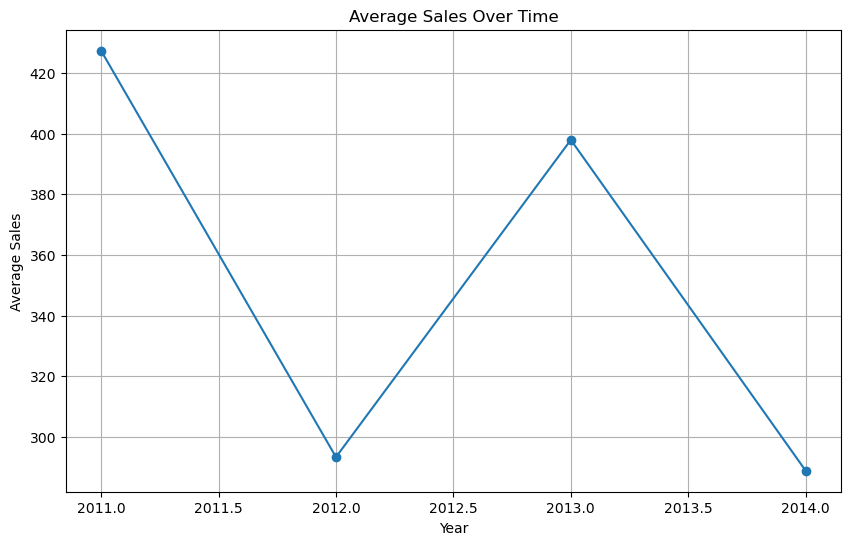

In [21]:
sales_trend_over_time = df.groupby(df['Order Date'].dt.year)['Sales'].mean()
plt.figure(figsize=(10, 6))
plt.plot(sales_trend_over_time.index, sales_trend_over_time.values, marker='o', linestyle='-')
plt.title('Average Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [22]:
### Average Transaction has a linear growth till 2013, whereas after 2013 due to low demand or inflation the average transaction amount has fallend down if we'vent remove the outliers

# Explore the dataset

### Question 1: Are there any outliers or values that don’t make sense?

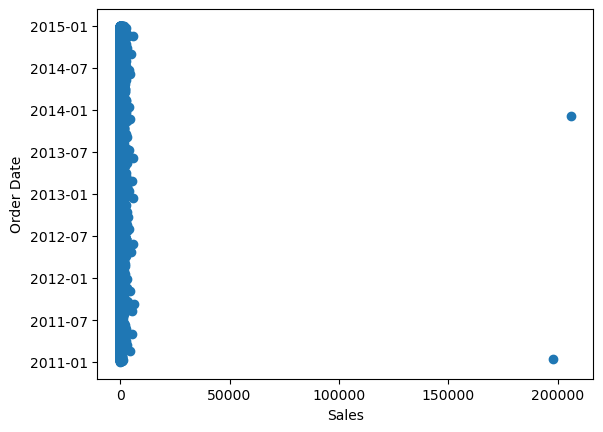

In [25]:
import matplotlib.pyplot as plt

# Ensure correct column names
x = df['Sales']  
y = df['Order Date']  

# Create scatter plot
plt.scatter(x, y)

# Add titles for axes
plt.xlabel('Sales')
plt.ylabel('Order Date')

# Display the plot
plt.show()


##### Using Scattered plot, there are 2 Outliers we can find which are having very High Value. Outliers could be treated by either removing them or transforming them depending on the context. In my context I pefer removing them

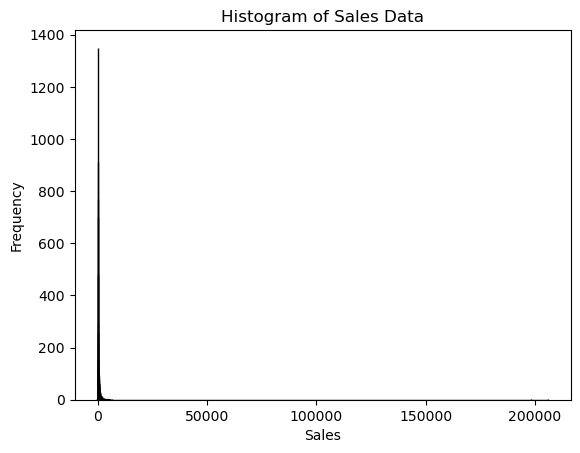

In [27]:
# Plot the histogram
plt.hist(df['Sales'], bins='auto', edgecolor='black')  
plt.title('Histogram of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


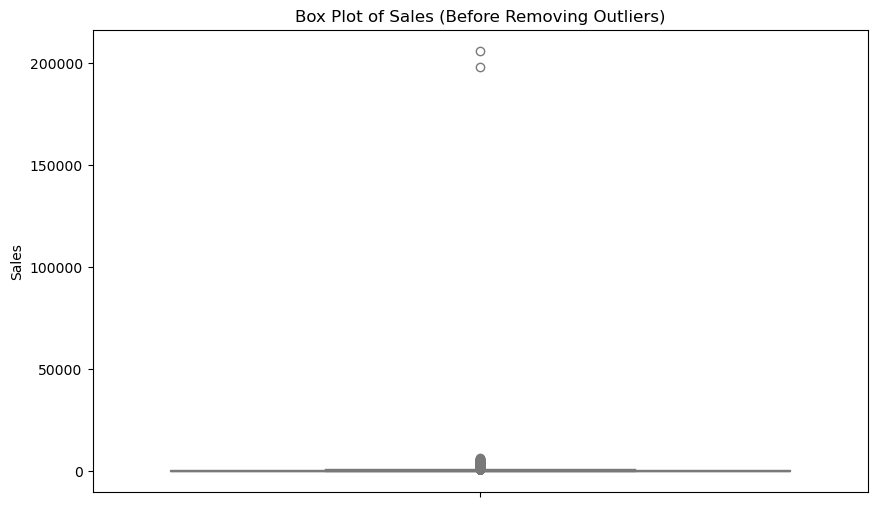

In [28]:
# Visualize the Sales distribution with a box plot (before removing outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Sales', color='lightblue')
plt.title('Box Plot of Sales (Before Removing Outliers)')
plt.ylabel('Sales')
plt.show()


Lower Boundary: -352.125, Upper Boundary: 714.875
Number of Outliers: 866


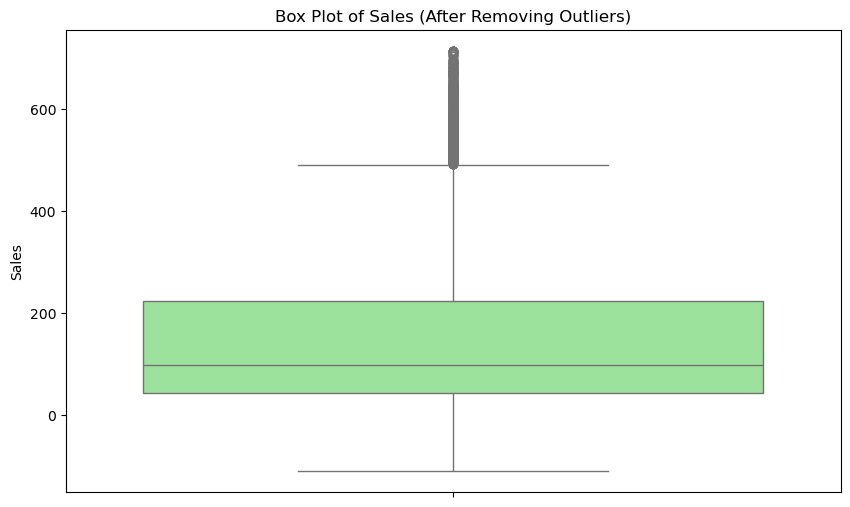

In [29]:
# # 2.1 Handle Outliers

# Calculate IQR and define outlier boundaries
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify outliers for analysis (optional step)
outliers = df[(df['Sales'] < lower_boundary) | (df['Sales'] > upper_boundary)]
outliers_count = outliers.shape[0]

# Print the boundaries and outlier count
print(f"Lower Boundary: {lower_boundary}, Upper Boundary: {upper_boundary}")
print(f"Number of Outliers: {outliers_count}")

# Remove the outliers from the dataset
df = df[(df['Sales'] >= lower_boundary) & (df['Sales'] <= upper_boundary)]

# Visualize the Sales distribution with a box plot (after removing outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Sales', color='lightgreen')
plt.title('Box Plot of Sales (After Removing Outliers)')
plt.ylabel('Sales')
plt.show()



### IQR Method:
##### Lower Bound: -352.125 
##### Upper Bound: 714.875
##### Sales values below -352.125  or above 714.875 were identified as potential outliers.

### Before Clipping:
##### The box plot shows extreme outliers in Sales, with values exceeding 714.875. These outliers significantly distort the distribution and may negatively impact statistical analysis.
##### Extreme sales values, potentially exceeding 200,000, are clearly visible.
### After Clipping:

##### After applying the clipping method:
##### All values are constrained within the IQR-defined bounds (-352.125  to 714.875).
##### The updated box plot shows no extreme outliers, with a much tighter distribution.

In [31]:
df.sort_values(by='Sales')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
180,BN-2011-1399750,2011-03-15,Wanda Wingert,United Kingdom,England,London,North,Consumer,Immediate,Office Supplies,Art,"Binney & Smith Pens, Blue",0.1,-110.0,4.0,1.0
7327,AZ-2014-6494772,2014-10-16,Kian Sykes,France,Provence-Alpes-Côte d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Art,"Stanley Markers, Fluorescent",0.0,-70.0,24.0,3.0
7328,AZ-2014-6494772,2014-10-16,Kian Sykes,France,Provence-Alpes-Côte d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Binders,"Cardinal Index Tab, Clear",0.0,-47.0,20.0,7.0
381,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0
2162,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0
5522,AZ-2014-2835554,2014-01-17,Holly Doyle,France,Corsica,Bastia,Central,Consumer,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0
2030,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0
525,BN-2011-3154402,2011-06-17,Larry Lambert,Sweden,Västra Götaland,Gothenburg,North,Consumer,Economy,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",0.5,714.0,-143.0,3.0


In [32]:
# Remove rows with negative values in the 'Sales' column
df = df[df['Sales'] >= 0]

In [33]:
df['Sales']

0        45.0
2       140.0
3        27.0
4        17.0
5        90.0
        ...  
8041     32.0
8042    245.0
8043     30.0
8044     23.0
8045    108.0
Name: Sales, Length: 7153, dtype: float64

In [34]:
df.sort_values(by= 'Sales', inplace = True)

In [35]:
df.tail()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
7012,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0
4919,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0
1413,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0
2030,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0
525,BN-2011-3154402,2011-06-17,Larry Lambert,Sweden,Västra Götaland,Gothenburg,North,Consumer,Economy,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",0.5,714.0,-143.0,3.0


### Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,variance, and standard deviations? (Without Outliers)

In [37]:
df['Sales'].describe()

count    7153.000000
mean      159.779533
std       159.700439
min         0.000000
25%        44.000000
50%        98.000000
75%       223.000000
max       714.000000
Name: Sales, dtype: float64

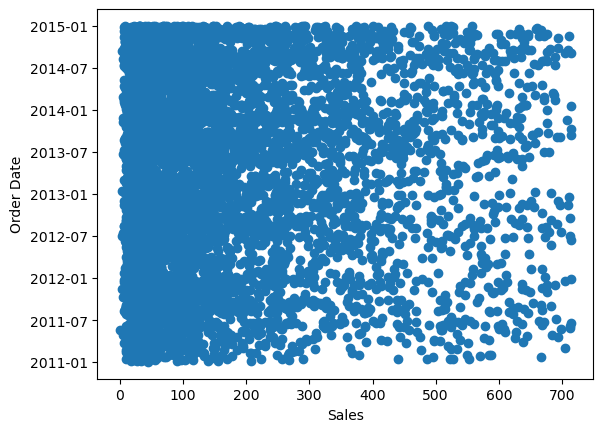

In [38]:
import matplotlib.pyplot as plt
x = df['Sales'] 
y = df['Order Date'] 

# Create scatter plot
plt.scatter(x, y)

# Add titles for axes
plt.xlabel('Sales')
plt.ylabel('Order Date')

# Display the plot
plt.show()


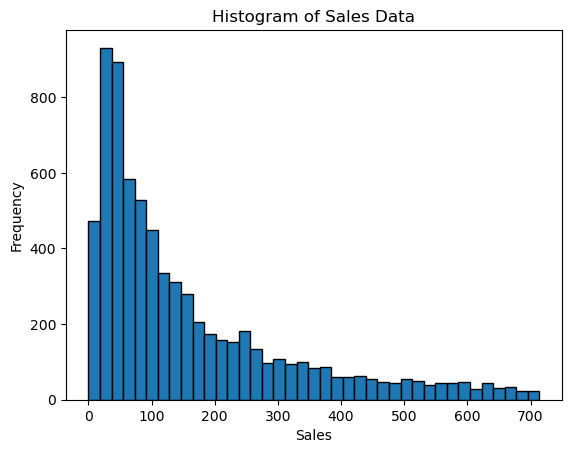

In [39]:
plt.hist(df['Sales'], bins='auto', edgecolor='black')  
plt.title('Histogram of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### 5. Do transaction amounts in general increase over time (perhaps due to inflation)?

In [41]:
df_con = df.groupby(df['Order Date'].dt.year)['Sales'].mean().reset_index()
df_con

,Order Date,Sales
0,2011,163.009317
1,2012,155.911659
2,2013,159.312533
3,2014,161.134566


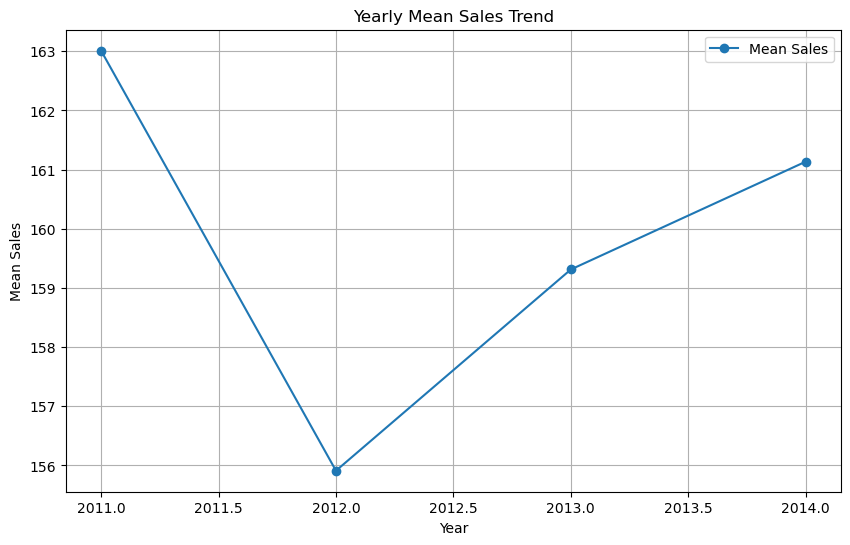

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df_con['Order Date'], df_con['Sales'], marker='o', linestyle='-', label='Mean Sales')
plt.title('Yearly Mean Sales Trend')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
df.sort_values(by='Sales')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
381,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0
2162,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0
3388,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0
1185,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0
7097,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0
4721,AZ-2013-885616,2013-09-14,James Casados,Spain,Navarra,Pamplona,South,Consumer,Priority,Furniture,Chairs,"Office Star Steel Folding Chair, Black",0.2,714.0,-179.0,10.0
5522,AZ-2014-2835554,2014-01-17,Holly Doyle,France,Corsica,Bastia,Central,Consumer,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0
7012,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0


### Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit

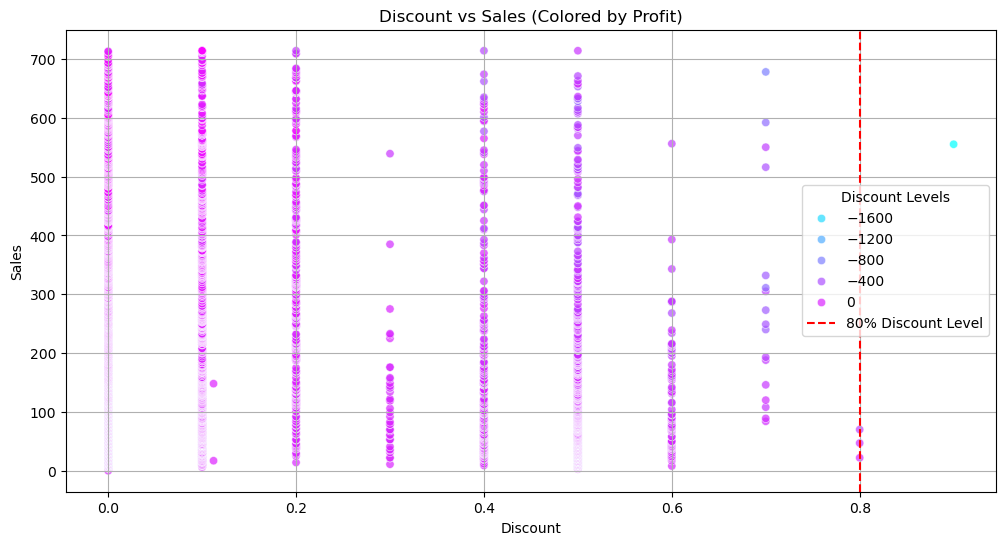

Average Sales at 80% Discount: 173.5
Average Profit at 80% Discount: -587.75
Optimum Discount Level for Maximizing Profit: 0.1


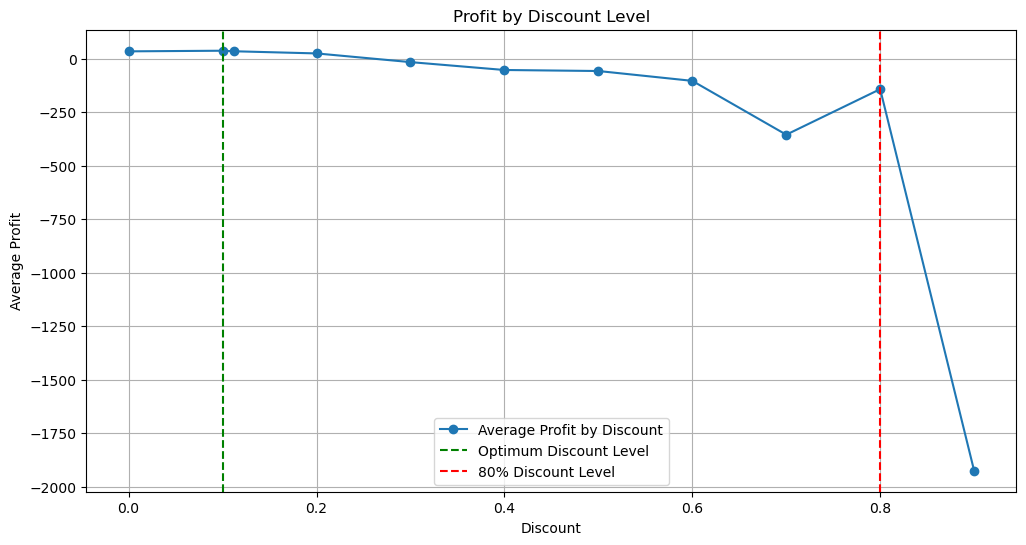

In [45]:
# Analyze the relationship between discounts, sales, and profits
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Profit', palette='cool', alpha=0.7)
plt.axvline(0.8, color='red', linestyle='--', label='80% Discount Level')
plt.title('Discount vs Sales (Colored by Profit)')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.legend(title='Discount Levels')
plt.grid()
plt.show()

# Comments based on the plot and cleaned data:
# - Discounts generally lead to an increase in sales, as indicated by the upward spread in Sales with increasing Discount levels.
# - At 80% discount level, sales are higher compared to lower discount levels, but profits decrease significantly due to the steep price reduction.
# - The optimum discount level for maximizing profit, based on the data, is calculated and displayed below.

# Insights at 80% discount level
discount_level = 0.8
sales_at_80_discount = df[df['Discount'] >= discount_level]['Sales'].mean()
profit_at_80_discount = df[df['Discount'] >= discount_level]['Profit'].mean()

# Identify the optimum discount level for maximizing total profit
average_profit_by_discount = df.groupby('Discount')['Profit'].mean()
optimum_discount = average_profit_by_discount.idxmax()

print("Average Sales at 80% Discount:", sales_at_80_discount)
print("Average Profit at 80% Discount:", profit_at_80_discount)
print("Optimum Discount Level for Maximizing Profit:", optimum_discount)


plt.figure(figsize=(12, 6))
plt.plot(average_profit_by_discount.index, average_profit_by_discount.values, marker='o', label='Average Profit by Discount')
plt.axvline(optimum_discount, color='green', linestyle='--', label='Optimum Discount Level')
plt.axvline(0.8, color='red', linestyle='--', label='80% Discount Level')
plt.title('Profit by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.legend()
plt.grid()
plt.show()


### What factors affect the sales the most? You can run a simple regression to understand the impact

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Selecting factors for analysis
categorical_factors = ['Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category']
numerical_factors = ['Discount', 'Quantity']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[categorical_factors], drop_first=True)

# Combine numerical factors with encoded categorical variables
X = pd.concat([df[numerical_factors], df_encoded], axis=1)

# Handle missing values in features and target
X = X.fillna(X.median())
y = df['Sales'].fillna(df['Sales'].median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract coefficients for each factor
coefficients = dict(zip(X.columns, model.coef_))

# Evaluate the model
r2 = r2_score(y_test, model.predict(X_test))

# Output results
print("Regression Coefficients (Factors Impacting Sales):", coefficients)
print("R-squared Value:", r2)



Regression Coefficients (Factors Impacting Sales): {'Discount': -148.4458105966017, 'Quantity': 30.307313766838462, 'Region_North': 1.523492693868831, 'Region_South': -4.1148526240509335, 'Segment_Corporate': 0.5969831470017835, 'Segment_Home Office': 0.7550940443561558, 'Ship Mode_Economy Plus': 3.163375442083439, 'Ship Mode_Immediate': 2.8703105344905206, 'Ship Mode_Priority': -2.9773503218293804, 'Category_Office Supplies': 141430537438449.34, 'Category_Technology': -45660212441683.875, 'Sub-Category_Appliances': -187090749880070.1, 'Sub-Category_Art': -187090749880245.84, 'Sub-Category_Binders': -187090749880273.44, 'Sub-Category_Bookcases': -45660212441475.125, 'Sub-Category_Chairs': -45660212441612.164, 'Sub-Category_Copiers': 250.9760455122082, 'Sub-Category_Envelopes': -187090749880259.34, 'Sub-Category_Fasteners': -187090749880297.94, 'Sub-Category_Furnishings': -45660212441740.52, 'Sub-Category_Labels': -187090749880319.9, 'Sub-Category_Machines': 136.32714798699106, 'Sub-Cat

##### **R-squared Value**:
- **0.574**: This indicates that **57.4%** of the variance in sales is explained by the included factors.
- The model has moderate explanatory power, meaning additional factors or improvements may be needed for stronger predictive performance.

##### **Key Factors Affecting Sales**:
1. **Numerical Factors**:
   - **`Discount`: -148.45**
     - A **negative coefficient** suggests that higher discounts reduce overall sales.
     - This indicates that heavy discounting might erode profit margins or reduce perceived value.
   - **`Quantity`: 30.31**
     - A **positive coefficient** shows that increasing the quantity sold increases sales.
     - For every additional unit sold, sales increase by approximately **$30.31**.

2. **Categorical Factors**:
   - **`Region`**:
     - `North`: Positive but minimal impact (**1.52**).
     - `South`: Negative (**-4.11**), indicating slightly lower sales contributions compared to other regions.
   - **`Segment`**:
     - Both `Corporate` (**0.60**) and `Home Office` (**0.76**) have slight positive impacts, though the `Consumer` segment likely remains the strongest baseline.
   - **`Ship Mode`**:
     - `Economy Plus` (**3.16**) and `Immediate` (**2.87**) positively impact sales, suggesting customer preference for these shipping options.
     - `Priority` (**-2.98**) has a slight negative impact, indicating possible lower usage or demand.

3. **Product Categories**:
   - **Potential Issues**:
     - Categories like `Office Supplies`, `Tables`, and sub-categories such as `Art` and `Binders` show unusually large negative coefficients, indicating possible scaling issues or multicollinearity.
   - **Interpretable Factors**:
     - **`Copiers`: 250.98**: A strong positive impact, highlighting its role as a high-value product.
     - **`Phones`: 107.16**: A significant contributor to sales.
     - **`Machines`: 136.33**: Another strong driver of sales.

### As some of the coefficients are way too big, It's hard to plot them with the smaller one, So I calculated VIF,such that we can visualize the coefficients.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factors:
                     Feature       VIF
0                   Discount  1.132598
1                   Quantity  1.024536
2               Region_North  1.122921
3               Region_South  1.096232
4          Segment_Corporate  1.110721
5        Segment_Home Office  1.109172
6     Ship Mode_Economy Plus  1.067916
7        Ship Mode_Immediate  1.037574
8         Ship Mode_Priority  1.066547
9   Category_Office Supplies       inf
10       Category_Technology  4.187885
11   Sub-Category_Appliances       inf
12          Sub-Category_Art       inf
13      Sub-Category_Binders       inf
14    Sub-Category_Bookcases  1.113445
15       Sub-Category_Chairs  1.229683
16      Sub-Category_Copiers  1.629327
17    Sub-Category_Envelopes       inf
18    Sub-Category_Fasteners       inf
19  Sub-Category_Furnishings  1.233197
20       Sub-Category_Labels       inf
21     Sub-Category_Machines  1.747526
22        Sub-Category_Paper       inf
23       Sub-Category_Phones  2.0110

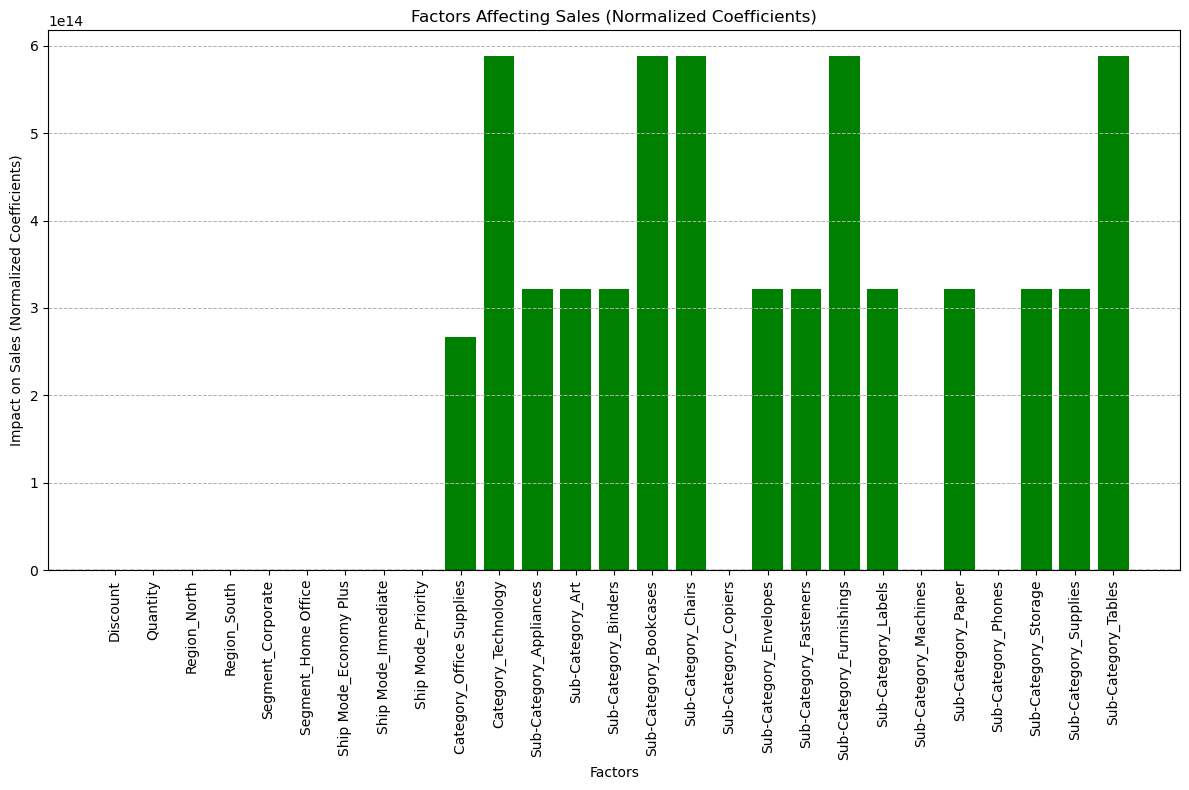

In [50]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Normalize numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Check for multicollinearity using Variance Inflation Factor (VIF)
X_vif = pd.DataFrame(X_normalized, columns=X.columns)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Fit the linear regression model again with normalized data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Extract coefficients
coefficients = dict(zip(X.columns, model.coef_))
print("Regression Coefficients (Normalized):", coefficients)

# Visualize coefficients
plt.figure(figsize=(12, 8))
colors = ['red' if coef < 0 else 'green' for coef in coefficients.values()]
plt.bar(coefficients.keys(), coefficients.values(), color=colors)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Factors Affecting Sales (Normalized Coefficients)')
plt.xlabel('Factors')
plt.ylabel('Impact on Sales (Normalized Coefficients)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


## Step 3: Determine origin year of customers

In [52]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
381,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0
2162,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0
3388,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0
1185,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0
7097,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0
4919,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0
1413,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0
2030,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0


In [53]:
# Safely create the 'Year' column using .loc
df.loc[:, 'Year'] = df['Order Date'].dt.year

In [54]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year
381,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011
2162,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012
3388,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013
1185,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011
7097,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014
4919,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013
1413,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011
2030,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012


In [55]:
# Need to identify the first year the customer made a purchase
#One customer can have multiple transactions over different years
dfEarlyOrder = df.groupby('Customer Name')['Year'].min()
dfEarlyOrder

Customer Name
Aaron Bootman       2011
Aaron Cunningham    2011
Aaron Davey         2011
Aaron Macrossan     2011
Abbie Perry         2011
                    ... 
Zara Loton          2013
Zara Money          2011
Zoe Lanigan         2011
Zoe Lowin           2011
Zona Meyer          2012
Name: Year, Length: 792, dtype: int32

In [56]:
dfEarlyOrder = dfEarlyOrder.reset_index()
dfEarlyOrder

,Customer Name,Year
0,Aaron Bootman,2011
1,Aaron Cunningham,2011
2,Aaron Davey,2011
3,Aaron Macrossan,2011
4,Abbie Perry,2011
...,...,...
787,Zara Loton,2013
788,Zara Money,2011
789,Zoe Lanigan,2011
790,Zoe Lowin,2011


In [57]:
df_final = pd.merge(df, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,Year_y
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012
2,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013,2011
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011
4,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014,2011
7149,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013,2012
7150,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011,2011
7151,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012,2012


In [58]:
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)

In [59]:
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012
2,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013,2011
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011
4,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014,2011
7149,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013,2012
7150,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011,2011
7151,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012,2012


## Step 4: Calculate cumulative transaction amounts

In [61]:
# Customer Tenure - Calculating age in num of months (how many years has the user been a customer)
df_final['CustomerTenure'] = (df_final['Order Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31

In [62]:
df_final
# each customer, each year, group by months and CustomerTenure? 0-12.00, 12.01-24.00,24.01-36.00, 

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear,CustomerTenure
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011,4.451613
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012,5.806452
2,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013,2011,24.000000
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011,10.290323
4,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014,2011,43.645161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014,2011,43.322581
7149,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013,2012,20.903226
7150,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011,2011,11.580645
7151,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012,2012,5.258065


In [63]:
def TenureRangeFunc(d):
    if (d['CustomerTenure'] <= 12):
        return 12
    elif (d['CustomerTenure'] > 12 and d['CustomerTenure']<= 24):
        return 24
    elif (d['CustomerTenure'] > 24 and d['CustomerTenure']<= 36):
        return 36
    elif (d['CustomerTenure'] > 36 and d['CustomerTenure']<= 48):
        return 48
    elif (d['CustomerTenure'] > 48 and d['CustomerTenure']<= 60):
        return 60
    else:
        return 72

In [64]:
df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)

In [65]:
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011,4.451613,12
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012,5.806452,12
2,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013,2011,24.000000,24
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011,10.290323,12
4,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014,2011,43.645161,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014,2011,43.322581,48
7149,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013,2012,20.903226,24
7150,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011,2011,11.580645,12
7151,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012,2012,5.258065,12


In [66]:
# Presenting in a tabular format
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='CustomerTenureRange', aggfunc = 'sum')

In [67]:
'''
This pivot table represent the sum of transactions for customers categorized 
into different age ranges (12, 24, 36, 48, 60, 72) and grouped by the year of their origin (OriginYear).
For example, in the cell corresponding to Age Range 12 and Origin Year 2010, 
the value 2277.70 represents the sum of amount spent by the customers 
who were in the age range of 12 and originated in the year 2010.
'''
trans_amount


CustomerTenureRange,12,24,36,48
OriginYear,,,,
2011,211911.0,162013.0,172987.0,220543.0
2012,101284.0,86911.0,94000.0,NaN
2013,45311.0,39489.0,NaN,NaN
2014,8454.0,NaN,NaN,NaN


In [68]:
trans_amount = trans_amount.cumsum(axis = 1) # axis = 1 to cumsum over columns
print(trans_amount)

CustomerTenureRange        12        24        36        48
OriginYear                                                 
2011                 211911.0  373924.0  546911.0  767454.0
2012                 101284.0  188195.0  282195.0       NaN
2013                  45311.0   84800.0       NaN       NaN
2014                   8454.0       NaN       NaN       NaN


In [69]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="CustomerTenure", value_name="Value")

In [70]:
unpivot_trans

,OriginYear,CustomerTenure,Value
0,2011,12,211911.0
1,2012,12,101284.0
2,2013,12,45311.0
3,2014,12,8454.0
4,2011,24,373924.0
5,2012,24,188195.0
6,2013,24,84800.0
7,2014,24,NaN
8,2011,36,546911.0
9,2012,36,282195.0


## Step 5: Calculate new customers

In [72]:
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011,4.451613,12
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012,5.806452,12
2,AZ-2013-273412,2013-01-14,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0.0,1.0,2013,2011,24.000000,24
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011,10.290323,12
4,BN-2014-5531507,2014-09-15,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3.0,1.0,2014,2011,43.645161,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,BN-2014-5801390,2014-09-05,Ashton Charles,Germany,Lower Saxony,Celle,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.1,714.0,56.0,4.0,2014,2011,43.322581,48
7149,BN-2013-6158270,2013-10-10,Jade Howe,Italy,Lombardy,Milan,South,Corporate,Economy Plus,Technology,Machines,"Epson Card Printer, Wireless",0.4,714.0,-309.0,7.0,2013,2012,20.903226,24
7150,AZ-2011-8557456,2011-12-26,Kieran Herbert,Spain,Madrid,Madrid,South,Consumer,Economy Plus,Office Supplies,Storage,"Smead Lockers, Single Width",0.1,714.0,278.0,4.0,2011,2011,11.580645,12
7151,AZ-2012-7754388,2012-06-12,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309.0,4.0,2012,2012,5.258065,12


In [73]:
# finding new customers. where origin year matches the transaction year
df_customer = df_final[df_final['OriginYear'] == df_final['Year_x']]

In [74]:
# A customer may also have multiple purchases within its origin year
df_customer.sort_values(by='Customer Name')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
1936,AZ-2011-2169445,2011-03-21,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Office Supplies,Labels,"Harbour Creations Round Labels, Laser Printer ...",0.0,47.0,7.0,7.0,2011,2011,2.548387,12
3763,AZ-2011-2169445,2011-03-21,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Office Supplies,Supplies,"Elite Box Cutter, High Speed",0.0,105.0,42.0,3.0,2011,2011,2.548387,12
3119,AZ-2011-2169445,2011-03-21,Aaron Bootman,Italy,Sicily,Marsala,South,Consumer,Priority,Technology,Phones,"Apple Office Telephone, Cordless",0.4,82.0,14.0,2.0,2011,2011,2.548387,12
3050,AZ-2011-3937280,2011-08-30,Aaron Bootman,Italy,Veneto,Vicenza,South,Consumer,Economy Plus,Office Supplies,Supplies,"Elite Letter Opener, High Speed",0.0,80.0,34.0,3.0,2011,2011,7.774194,12
2933,AZ-2011-3937280,2011-08-30,Aaron Bootman,Italy,Veneto,Vicenza,South,Consumer,Economy Plus,Furniture,Furnishings,"Tenex Light Bulb, Duo Pack",0.0,76.0,9.0,4.0,2011,2011,7.774194,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AZ-2012-5862496,2012-07-24,Zona Meyer,France,Provence-Alpes-Côte d'Azur,Nice,Central,Corporate,Economy,Office Supplies,Paper,"SanDisk Parchment Paper, Premium",0.0,33.0,6.0,2.0,2012,2012,6.612903,12
748,AZ-2012-3229399,2012-06-02,Zona Meyer,Germany,Lower Saxony,Oldenburg,Central,Corporate,Economy,Office Supplies,Storage,"Fellowes Folders, Industrial",0.1,24.0,3.0,1.0,2012,2012,4.935484,12
2291,AZ-2012-3229399,2012-06-02,Zona Meyer,Germany,Lower Saxony,Oldenburg,Central,Corporate,Economy,Office Supplies,Fasteners,"Advantus Paper Clips, Metal",0.0,54.0,13.0,4.0,2012,2012,4.935484,12
4221,AZ-2012-5862496,2012-07-24,Zona Meyer,France,Provence-Alpes-Côte d'Azur,Nice,Central,Corporate,Economy,Office Supplies,Storage,"Smead Shelving, Wire Frame",0.1,130.0,52.0,3.0,2012,2012,6.612903,12


In [75]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1480
False     792
Name: count, dtype: int64

In [76]:
df_cust_noDup = df_customer.drop_duplicates(subset = ['Customer Name'])

In [77]:
df_cust_noDup

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year_x,OriginYear,CustomerTenure,CustomerTenureRange
0,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0,2011,2011,4.451613,12
1,BN-2012-8400051,2012-06-29,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1.0,1.0,2012,2012,5.806452,12
3,BN-2011-5491702,2011-11-16,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2.0,1.0,2011,2011,10.290323,12
5,BN-2011-553410,2011-05-21,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",0.5,5.0,0.0,2.0,2011,2011,4.516129,12
6,BN-2011-1778575,2011-10-08,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",0.5,5.0,0.0,2.0,2011,2011,9.032258,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,BN-2011-7737747,2011-05-12,Patrick Townson,France,Aquitaine-Limousin-Poitou-Charentes,Bordeaux,Central,Home Office,Priority,Furniture,Tables,"Chromcraft Wood Table, with Bottom Storage",0.4,627.0,-135.0,2.0,2011,2011,4.225806,12
7012,AZ-2011-5827692,2011-06-28,Jonathan Bottrill,United Kingdom,Scotland,Glasgow,North,Consumer,Economy,Technology,Machines,"Okidata Inkjet, Wireless",0.0,628.0,6.0,2.0,2011,2011,5.741935,12
7041,AZ-2011-7873401,2011-08-18,Claire Harrington,Germany,North Rhine-Westphalia,Cologne,Central,Home Office,Economy Plus,Technology,Copiers,"Canon Fax Machine, Color",0.0,640.0,160.0,2.0,2011,2011,7.387097,12
7084,BN-2011-8607391,2011-06-09,William Reichert,France,Nord-Pas-de-Calais-Picardie,Hautmont,Central,Consumer,Priority,Technology,Copiers,"Canon Copy Machine, Digital",0.2,668.0,-31.0,3.0,2011,2011,5.129032,12


In [78]:
new_cust = df_final.groupby('OriginYear')['Customer Name'].nunique()
new_cust

OriginYear
2011    473
2012    208
2013     91
2014     20
Name: Customer Name, dtype: int64

## Step 6: Historic CLV

In [80]:
# Now to calculate customer lifetime value, I will use the unpivoted sales amount df, merge with above
# new_cust 
unpivot_trans

,OriginYear,CustomerTenure,Value
0,2011,12,211911.0
1,2012,12,101284.0
2,2013,12,45311.0
3,2014,12,8454.0
4,2011,24,373924.0
5,2012,24,188195.0
6,2013,24,84800.0
7,2014,24,NaN
8,2011,36,546911.0
9,2012,36,282195.0


In [81]:
new_cust

OriginYear
2011    473
2012    208
2013     91
2014     20
Name: Customer Name, dtype: int64

In [82]:
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
#Note: Unpivot by default takes Column name as Customer ID, we need to change it NewCustCount below
df_final_trans.rename(columns = {'Customer Name': 'NewCustCount'}, inplace = True)
df_final_trans

,OriginYear,CustomerTenure,Value,NewCustCount
0,2011,12,211911.0,473
1,2012,12,101284.0,208
2,2013,12,45311.0,91
3,2014,12,8454.0,20
4,2011,24,373924.0,473
5,2012,24,188195.0,208
6,2013,24,84800.0,91
7,2014,24,NaN,20
8,2011,36,546911.0,473
9,2012,36,282195.0,208


#### Dividing the transaction values by the new customers will give as an annual measurement of the cumalative amount spent per customer in each group of annualy acquired customer. This will be our Historic CLV.

In [84]:
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCustCount']

In [85]:
df_final_trans

,OriginYear,CustomerTenure,Value,NewCustCount,CLV
0,2011,12,211911.0,473,448.014799
1,2012,12,101284.0,208,486.942308
2,2013,12,45311.0,91,497.923077
3,2014,12,8454.0,20,422.700000
4,2011,24,373924.0,473,790.536998
5,2012,24,188195.0,208,904.783654
6,2013,24,84800.0,91,931.868132
7,2014,24,NaN,20,NaN
8,2011,36,546911.0,473,1156.260042
9,2012,36,282195.0,208,1356.706731


### Step - 7 Interpreting your results 

In [87]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='CustomerTenure', aggfunc = 'sum')

In [88]:
CLV_table

CustomerTenure,12,24,36,48
OriginYear,,,,
2011,448.014799,790.536998,1156.260042,1622.524313
2012,486.942308,904.783654,1356.706731,0.000000
2013,497.923077,931.868132,0.000000,0.000000
2014,422.700000,0.000000,0.000000,0.000000


<Axes: xlabel='CustomerTenure', ylabel='CLV'>

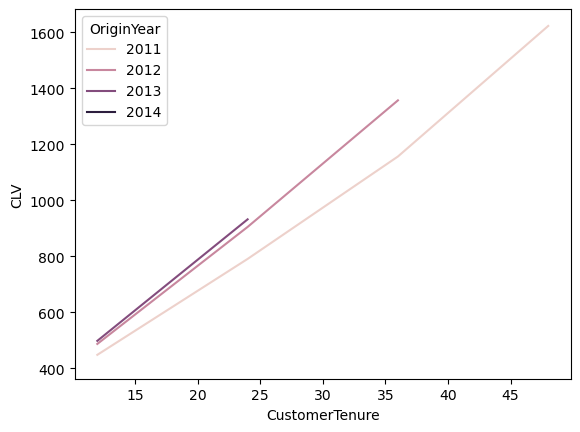

In [89]:
sns.lineplot(x = df_final_trans['CustomerTenure'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])

In [91]:
#Volume weighted average
# We take the average of each age group over all the years to arrive at the following.
df_final_trans.groupby('CustomerTenure')['CLV'].mean()

CustomerTenure
12     463.895046
24     875.729595
36    1256.483387
48    1622.524313
Name: CLV, dtype: float64

In [92]:
df_final_trans.groupby('OriginYear')['Value'].sum()

OriginYear
2011    1900200.0
2012     571674.0
2013     130111.0
2014       8454.0
Name: Value, dtype: float64

In [93]:
trans_amount # Spent on Customer Aquisition in 2011 = 767454.0

CustomerTenureRange,12,24,36,48
OriginYear,,,,
2011,211911.0,373924.0,546911.0,767454.0
2012,101284.0,188195.0,282195.0,NaN
2013,45311.0,84800.0,NaN,NaN
2014,8454.0,NaN,NaN,NaN


### Does Each Group of Customers Exhibit Similar or Different Patterns of Spending?

##### **1. Customer Spending Patterns by Origin Year**:
- **2011 Customers**:
  - Show the highest **CLV (Customer Lifetime Value)** growth, reaching over **1600** by 48 months.
  - Indicates strong spending patterns and long-term engagement.
- **2012 Customers**:
  - Exhibit steady CLV growth, peaking at **1356** by 36 months.
  - Reflects a moderately strong performance, though not as high as 2011.
- **2013 Customers**:
  - CLV growth is observed only up to **24 months**, with a lower value of **931**.
  - Indicates shorter engagement and reduced spending.
- **2014 Customers**:
  - Display minimal growth, with CLV peaking at **422** by 12 months.
  - Suggests limited spending and lower customer retention.

##### **2. Differences Across Groups**:
- Customers from **earlier origin years (2011, 2012)** have higher spending patterns and longer engagement compared to those from **2013 and 2014**.
- The variance in CLV across origin years highlights possible differences in acquisition strategies, market conditions, or customer retention efforts.

---

##### **Implications for the Business**:
1. **Retention and Engagement**:
   - Replicate the success of **2011 and 2012 cohorts** by analyzing what drove their higher CLV (e.g., loyalty programs, customer experience, product offerings).
   - Address retention issues for **2013 and 2014 cohorts** by enhancing early-stage engagement strategies.

2. **Customer Acquisition**:
   - Reevaluate acquisition strategies for **2013 and 2014 cohorts** to attract higher-value customers.
   - Investigate whether changes in marketing, product offerings, or segmentation contributed to lower spending.

3. **Business Strategy**:
   - Use insights from **high-performing cohorts** (e.g., 2011) to optimize pricing, promotions, and loyalty programs.
   - Tailor strategies for different customer groups based on their tenure and spending behaviors.

4. **Focus on Long-Term Value**:
   - Invest in strategies to extend customer tenure and maximize CLV over time, especially for newer cohorts with lower engagement.
